'''
【课程2.3】  数据归一化/标准化

 数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。
 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权
 
最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上

0-1标准化 / Z-score标准化

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [4]:
# 数据标准化
# （1）0-1标准化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数（即Min=0，Max=1）进行数据的归一化处理
# x = (x - Min) / (Max - Min)

df = pd.DataFrame({"value1":np.random.rand(10)*20,    # 创建数据
                  'value2':np.random.rand(10)*100})
print(df.head())
print('------')

def data_norm(df,*cols):                              # 创建函数，标准化数据
    df_n = df.copy()
    for col in cols:
        ma = df[col].max()
        mi = df[col].min()
        df_n[col+'_n'] = (df[col]-mi)/(ma-mi)
    return(df_n)

df_n = data_norm(df,'value1','value2')
print(df_n.head())

      value1     value2
0   3.207934  53.847695
1   9.984283  16.920035
2   2.179335   6.784587
3  10.171594  82.766498
4   5.032813  53.189547
------
      value1     value2  value1_n  value2_n
0   3.207934  53.847695  0.240949  0.639354
1   9.984283  16.920035  0.760719  0.178830
2   2.179335   6.784587  0.162052  0.052431
3  10.171594  82.766498  0.775086  1.000000
4   5.032813  53.189547  0.380924  0.631146


In [7]:
# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

df = pd.DataFrame({"value1":np.random.rand(10)*20,    # 创建数据
                  'value2':np.random.rand(10)*100})
print(df.head())
print('------')

def data_znorm(df,*cols):                            # 创建函数，标准化数据
    df_n = df.copy()
    for col in cols:
        u = df[col].mean()
        std = df[col].std()
        df_n[col+'_Zn'] = (df[col]-u)/std
    return(df_n)

df_z = data_znorm(df,'value1','value2')
u_z = df_z['value1_Zn'].mean()
std_z = df_z['value1_Zn'].std()
print(df_z)
print('标准化之后的均值:%.2f,标准化之后的标准差:%.2f'%(u_z,std_z))

'''
 标准化数据
 经过处理的数据符合标准正态分布，即均值为0，标准差为1

 什么情况用Z-score标准化：
 在分类、聚类算法中，需要使用距离来度量相似性的时候，Z-score表现更好
'''

      value1     value2
0   0.468657  88.922558
1  13.799111  55.850955
2   5.153232  30.471382
3   3.518851   3.483426
4  15.734953  36.993937
------
      value1     value2  value1_Zn  value2_Zn
0   0.468657  88.922558  -1.106330   1.673087
1  13.799111  55.850955   0.678534   0.502111
2   5.153232  30.471382  -0.479095  -0.396510
3   3.518851   3.483426  -0.697928  -1.352081
4  15.734953  36.993937   0.937732  -0.165565
5   1.354072  43.933267  -0.987779   0.080138
6  19.170676  83.063488   1.397753   1.465633
7   2.658147  29.999399  -0.813171  -0.413222
8  19.316282  37.962102   1.417249  -0.131284
9   6.140050   6.018877  -0.346966  -1.262307
标准化之后的均值:-0.00,标准化之后的标准差:1.00


,value1,value2,value1_n,value2_n,f
F,25.230556,94.284092,0.948844,1.000000,0.969306
D,23.579366,72.540658,0.883602,0.749529,0.829973
B,23.242301,60.238915,0.870284,0.607821,0.765299
A,26.525262,29.909956,1.000000,0.258450,0.703380
I,19.079549,29.520824,0.705805,0.253968,0.525070
G,11.312465,55.892750,0.398912,0.557756,0.462450
E,17.379117,22.332950,0.638618,0.171168,0.451638
C,19.974773,7.473840,0.741177,0.000000,0.444706
J,10.523087,37.846619,0.367722,0.349875,0.360584
H,1.216479,28.277059,0.000000,0.239640,0.095856


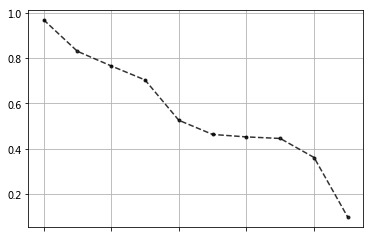

In [17]:
# 案例应用
# 八类产品的两个指标value1，value2，其中value1权重为0.6，value2权重为0.4
# 通过0-1标准化，判断哪个产品综合指标状况最好

df = pd.DataFrame({'value1':np.random.rand(10)*30,
                   'value2':np.random.rand(10)*100},
                  index = list('ABCDEFGHIJ'))
print(df)

df_n1 = data_norm(df,'value1','value2')                                # 进行标准化处理
print(df_n1)
df_n1['f'] = df_n1['value1_n'] * 0.6 + df_n1['value2_n'] * 0.4
df_n1.sort_values(by = 'f',inplace=True,ascending=False)
df_n1['f'].plot(kind = 'line', style = '--.k', alpha = 0.8, grid = True)
df_n1